In [17]:
# %% [markdown]
# ## 1️⃣ Importação de bibliotecas

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew
import joblib, os


In [3]:
# %% [markdown]
# ## 2️⃣ Carregar o dataset original

# %%
df = pd.read_csv('../data/students_performance.csv')
print("Tamanho original:", df.shape)
df.head()


Tamanho original: (2510, 14)


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade
0,STD01416,22,M,bachelor,5.66,69.55,Yes,6.49,49.41,No,Good,Medium,Good,85.39
1,STD01345,19,M,bachelor,13.30,58.82,Yes,8.12,50.29,No,NaN,Medium,Good,98.43
2,STD01705,25,M,master,10.43,59.72,Yes,6.60,71.64,No,Good,Medium,Good,100.00
3,STD00299,21,F,bachelor,3.90,68.33,Yes,6.99,50.93,Yes,Poor,Low,Excellent,86.85
4,STD01762,19,F,bachelor,4.24,50.44,Yes,8.06,54.00,No,Poor,Medium,Excellent,83.25


In [4]:
# %% [markdown]
# ## 3️⃣ Tratar valores faltantes

# %%
print("Valores faltantes antes:")
print(df.isnull().sum())

num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nValores faltantes após o tratamento:")
print(df.isnull().sum())


Valores faltantes antes:
student_id              0
age                     0
gender                  0
parental_education      0
study_hours_week      293
attendance_rate       232
extracurricular         0
sleep_hours           266
previous_scores       127
tutoring                0
internet_quality      155
family_income         278
health_status           0
final_grade             0
dtype: int64

Valores faltantes após o tratamento:
student_id            0
age                   0
gender                0
parental_education    0
study_hours_week      0
attendance_rate       0
extracurricular       0
sleep_hours           0
previous_scores       0
tutoring              0
internet_quality      0
family_income         0
health_status         0
final_grade           0
dtype: int64


C:\Users\ralys\AppData\Local\Temp\ipykernel_17216\1248518761.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\ralys\AppData\Local\Temp\ipykernel_17216\1248518761.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
# %% [markdown]
# ## 4️⃣ Detecção e remoção de outliers (Z-score)

# %%
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]
print("Tamanho após remover outliers:", df.shape)


Tamanho após remover outliers: (2432, 14)


In [6]:
# %% [markdown]
# ## 5️⃣ Remover duplicatas

# %%
print("Duplicadas antes:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicadas depois:", df.duplicated().sum())


Duplicadas antes: 0
Duplicadas depois: 0


Assimetria antes:
 age                -0.024147
study_hours_week    0.135673
attendance_rate    -0.246770
sleep_hours         0.032383
previous_scores    -0.077967
final_grade        -0.688839
dtype: float64

Assimetria após correção:
 age                -0.024147
study_hours_week    0.135673
attendance_rate    -0.246770
sleep_hours         0.032383
previous_scores    -0.077967
final_grade        -0.688839
dtype: float64


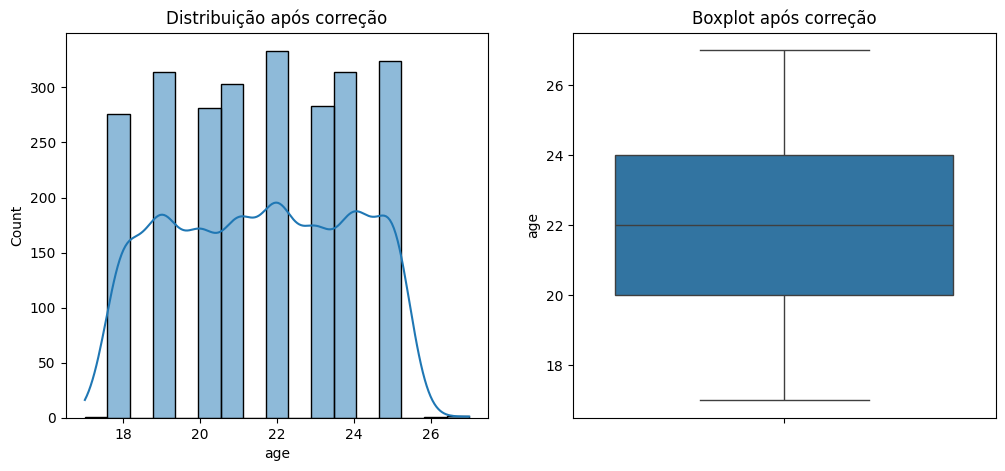

In [7]:
# %% [markdown]
# ## 6️⃣ Análise de assimetria (skewness) e correção

# %%
skew_vals = df[numeric_cols].skew()
print("Assimetria antes:\n", skew_vals)

for col in numeric_cols:
    if abs(skew_vals[col]) > 1:
        df[col] = np.log1p(df[col])

print("\nAssimetria após correção:\n", df[numeric_cols].skew())

fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df[numeric_cols[0]], kde=True, ax=axes[0])
sns.boxplot(df[numeric_cols[0]], ax=axes[1])
axes[0].set_title('Distribuição após correção')
axes[1].set_title('Boxplot após correção')
plt.show()


In [8]:
# %% [markdown]
# ## 7️⃣ Encoding de variáveis categóricas (One-Hot)

# %%
df_encoded = pd.get_dummies(df, drop_first=True)
print("Tamanho após encoding:", df_encoded.shape)
df_encoded.head()


Tamanho após encoding: (2432, 2487)


,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade,student_id_STD00002,student_id_STD00003,student_id_STD00004,student_id_STD00005,...,family_income_MEDIUM,family_income_Medium,health_status_ Good,health_status_ Poor,health_status_EXCELLENT,health_status_Excellent,health_status_GOOD,health_status_Good,health_status_POOR,health_status_Poor
0,22,5.66,69.55,6.49,49.41,85.39,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,19,13.30,58.82,8.12,50.29,98.43,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,25,10.43,59.72,6.60,71.64,100.00,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,21,3.90,68.33,6.99,50.93,86.85,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,19,4.24,50.44,8.06,54.00,83.25,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [9]:
# %% [markdown]
# ## 8️⃣ Criação de Novas Features

# %%
print("Colunas disponíveis:", df_encoded.columns.tolist())

if 'previous_scores' in df_encoded.columns and 'final_grade' in df_encoded.columns:
    df_encoded['average_score'] = df_encoded[['previous_scores','final_grade']].mean(axis=1)
    df_encoded['diff_prev_final'] = df_encoded['final_grade'] - df_encoded['previous_scores']

print("\n✅ Novas features criadas:")
print(df_encoded[['average_score','diff_prev_final']].head())


Colunas disponíveis: ['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores', 'final_grade', 'student_id_STD00002', 'student_id_STD00003', 'student_id_STD00004', 'student_id_STD00005', 'student_id_STD00006', 'student_id_STD00007', 'student_id_STD00008', 'student_id_STD00009', 'student_id_STD00010', 'student_id_STD00011', 'student_id_STD00012', 'student_id_STD00013', 'student_id_STD00014', 'student_id_STD00015', 'student_id_STD00016', 'student_id_STD00017', 'student_id_STD00018', 'student_id_STD00019', 'student_id_STD00020', 'student_id_STD00021', 'student_id_STD00022', 'student_id_STD00023', 'student_id_STD00024', 'student_id_STD00025', 'student_id_STD00026', 'student_id_STD00027', 'student_id_STD00028', 'student_id_STD00029', 'student_id_STD00030', 'student_id_STD00031', 'student_id_STD00032', 'student_id_STD00033', 'student_id_STD00034', 'student_id_STD00035', 'student_id_STD00036', 'student_id_STD00038', 'student_id_STD00039', 'student_id_STD00040', 'student_

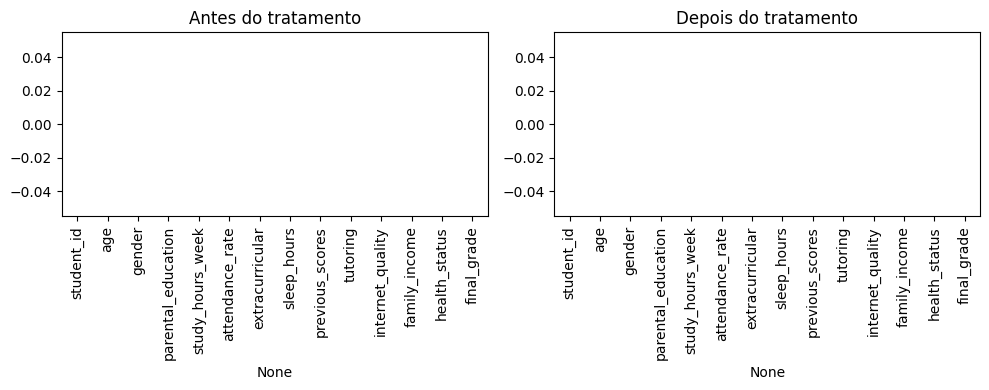

In [10]:
# %% [markdown]
# ## 1️⃣ Missing Values – Antes × Depois

# %%
missing_before = df.isnull().sum()
df_filled = df.fillna(df.median(numeric_only=True))
missing_after = df_filled.isnull().sum()

fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.barplot(x=missing_before.index, y=missing_before.values, ax=axes[0])
axes[0].set_title('Antes do tratamento'); axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x=missing_after.index, y=missing_after.values, ax=axes[1])
axes[1].set_title('Depois do tratamento'); axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout(); plt.show()


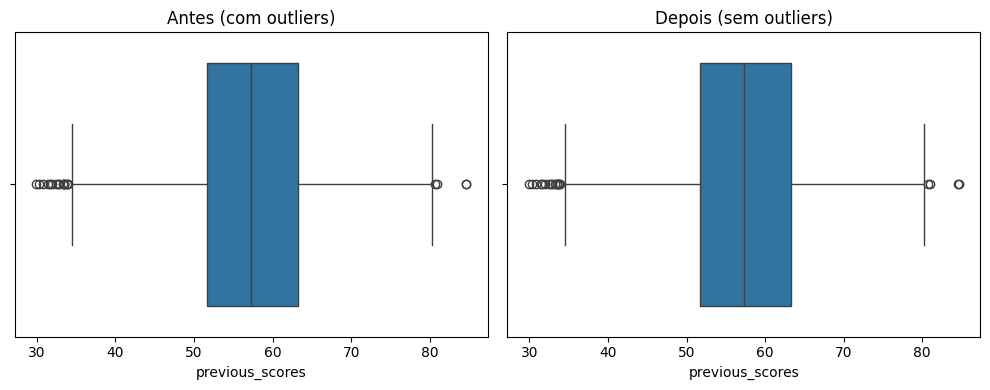

In [11]:
# %% [markdown]
# ## 2️⃣ Outliers – Antes × Depois

# %%
col = 'previous_scores'
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x=df[col], ax=axes[0]); axes[0].set_title('Antes (com outliers)')
sns.boxplot(x=df_encoded[col], ax=axes[1]); axes[1].set_title('Depois (sem outliers)')
plt.tight_layout(); plt.show()


c:\Users\ralys\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ralys\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


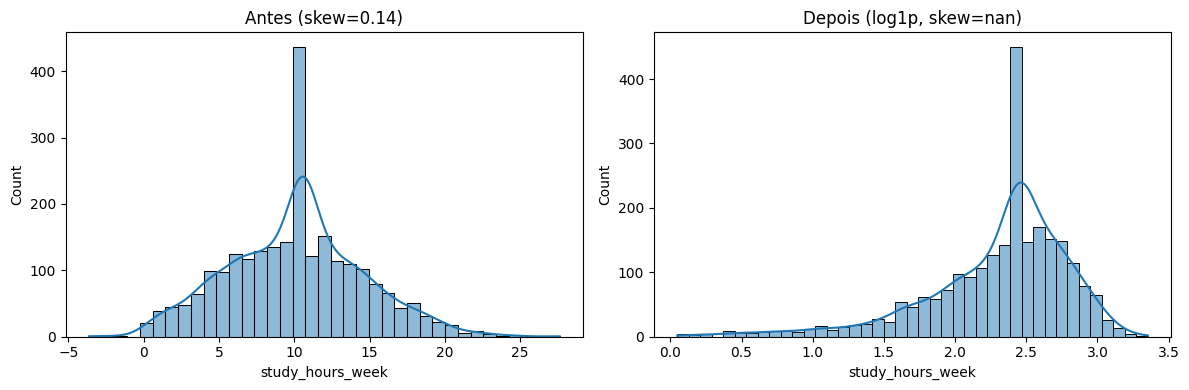

In [12]:
# %% [markdown]
# ## 3️⃣ Distribuições (Skewness) – Antes × Depois

# %%
col = 'study_hours_week'
fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df[col], kde=True, ax=axes[0])
axes[0].set_title(f'Antes (skew={skew(df[col]):.2f})')

sns.histplot(np.log1p(df[col]), kde=True, ax=axes[1])
axes[1].set_title(f'Depois (log1p, skew={skew(np.log1p(df[col])):.2f})')

plt.tight_layout(); plt.show()


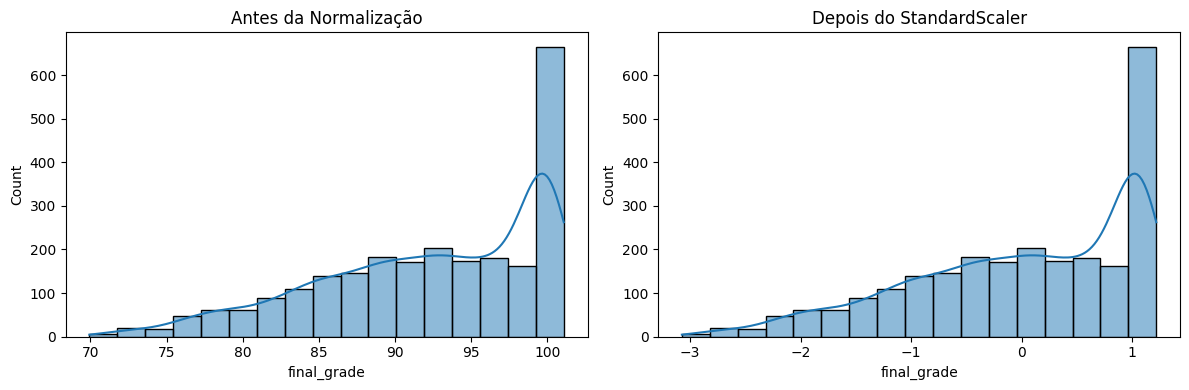

In [18]:
# Garantir que final_grade seja numérica
df_encoded['final_grade'] = pd.to_numeric(df_encoded['final_grade'], errors='coerce')

# Aplicar scaler
scaler = StandardScaler()
numeric_cols_encoded = df_encoded.select_dtypes(include=['float64','int64']).columns
df_encoded[numeric_cols_encoded] = scaler.fit_transform(df_encoded[numeric_cols_encoded])

# Plot Antes × Depois
col = 'final_grade'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df[col], kde=True, ax=axes[0]); axes[0].set_title('Antes da Normalização')
sns.histplot(df_encoded[col], kde=True, ax=axes[1]); axes[1].set_title('Depois do StandardScaler')
plt.tight_layout(); plt.show()


In [14]:
# %% [markdown]
# ## 🔚 Exportação dos Dados e do Scaler

# %%
os.makedirs('../data', exist_ok=True)
os.makedirs('../models', exist_ok=True)

df_encoded.to_csv('../data/students_clean.csv', index=False)
joblib.dump(scaler, '../models/scaler.pkl')

print("Dados Salvos:")
print("→ ../data/students_clean.csv")
print("→ ../models/scaler.pkl")



Dados Salvos:
→ ../data/students_clean.csv
→ ../models/scaler.pkl
